In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Load datasets

recent_grads = pd.read_csv('recent-grads.csv')

# Data Exploration

In [4]:
# Top rows
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
# Last rows
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409,3050,5359,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854,522,2332,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838,568,2270,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626,931,3695,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098,134,964,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# Shape of the dataframe
recent_grads.shape

(173, 21)

# Cleaning data

In [7]:
# Drop the NaN values
recent_grads = recent_grads.dropna()

# Check shape now
recent_grads.shape

(172, 21)

We lost a row.

# Data Visualization

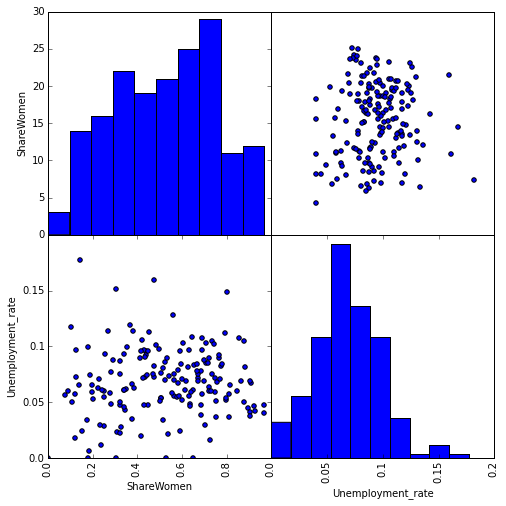

In [8]:
# Scatter Matrix tuning using medial level abstraction.
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.hist(recent_grads["ShareWomen"])
ax2.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"])
ax3.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])
ax4.hist(recent_grads["Unemployment_rate"])
#ax1.set_xlim(0,30)
#ax2.set_xlim(0.0,1.0)
ax3.set_xlim(0.0,1.0)
ax3.set_ylim(0.0,0.20)
ax4.set_xlim(0.0, 0.20)
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax1.set_ylabel("ShareWomen")
ax3.set_xlabel("ShareWomen")
ax3.set_ylabel("Unemployment_rate")
ax4.set_xlabel("Unemployment_rate")
ax1.set_yticklabels([0,5,10,15,20,25,30])
ax3.set_yticklabels([0.00,0.05,0.10,0.15])
ax3.set_xticklabels([0.0,0.2,0.4,0.6,0.8], rotation=90)
ax4.set_xticklabels([0.00,0.05,0.10,0.15,0.20], rotation=90)
fig.subplots_adjust(hspace = 0, wspace = 0)
plt.show()



A scatter Matrix

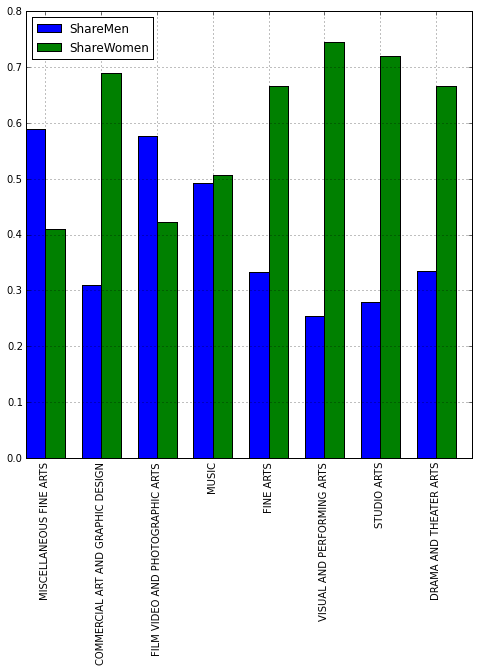

In [24]:
# Grouped Bar Plot
recent_grads["ShareMen"] = recent_grads["Men"]/recent_grads["Total"]
arts_majors = recent_grads[recent_grads["Major_category"] == "Arts"]
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
locs = np.arange(0,8)
width = 0.35
bar_1 = ax1.bar(left = locs, height = arts_majors["ShareMen"].tolist(), width = width)
ax1.set_xticklabels( arts_majors["Major"].tolist(), rotation = 90)
offset_locs = locs + width
bar_2 = ax1.bar(left = offset_locs, height = arts_majors["ShareWomen"].tolist(), width = width, color = "green")
ax1.set_xticks(offset_locs)
plt.legend((bar_1,bar_2),("ShareMen","ShareWomen"), loc = "upper left")
plt.grid()





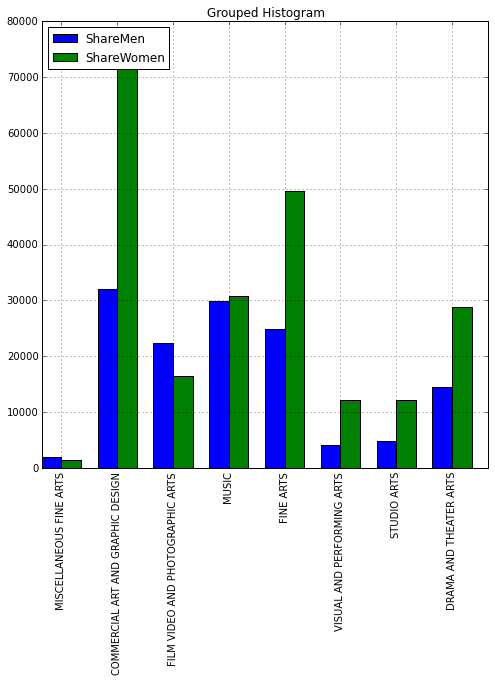

In [34]:
# A grouped histogram
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
locs = np.arange(0,8)
width = 0.35
bar_1 = ax1.bar(left = locs, height = arts_majors["Men"].tolist(), width = width)
ax1.set_xticklabels( arts_majors["Major"].tolist(), rotation = 90)
offset_locs = locs + width
bar_2 = ax1.bar(left = offset_locs, height = arts_majors["Women"].tolist(), width = width, color = "green")
ax1.set_xticks(offset_locs)
plt.legend((bar_1,bar_2),("ShareMen","ShareWomen"), loc = "upper left")
plt.title("Grouped Histogram")
plt.grid()
